# <span style='color:red'> #KeepItOn </span> 📡 Data Analysis


# __The Context:__

Access Now is a growing international human rights organization dedicated to defending and extending the digital rights of users at risk around the world. This task falls within the #KeepItOn campaign, a global initiative to end internet shutdowns through advocacy, documentation and monitoring, direct policy-maker engagement, strategic litigation among others.

***

<span style='color:red'> My Considerations: </span>

Technical problems found:
- The data needed a lot of cleaning, a lot of durations are missing because of data inaccurate syntax, same values written differently, strings with extra spaces, read me file is somewhat confusing and probably outdated since it mentions columns that do not exist in the csv file given or have another name and presumably hold the same content.

Solution:
- Data cleaning;
- Updating the read me methodology file.

Next steps:
- Ensure the data is cleaned for the database format before merging the data;
- Keep a consistent checking and updating schedule for the STOP methodology;

Further next steps to work with:
- Check the correlation between the event and the impact caused in a deeper analysis (checking for example the corr of violent episodes and social media shutdowns and so on);
- With historical data, attempt to predict when, where and how may a next shutdown occur, by using Machine Learning models;
- Do a Twitter Sentiment Analysis for predicting forthcoming political shutdowns (since political instability accounts for more than 50% of STOP cases actual reason of being).
***

## Initial code:

In [1]:
# main imports and functions for all code performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def count_columns(x):
    for c in x.columns:
        print("---- %s ---" % c)
        print(f"{x[c].value_counts().nlargest().to_string()}\n\n")
        
        

df = pd.read_csv('KeepItOn-STOP-Data-2020.csv', header=1)

Data Cleaning:

- remove duplicates
- remove the white space from the column name as well as the content
- format the type of data
- make all lower case
- format the type of data
- drop columns that have no data

In [2]:
# remove duplicates

df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [3]:
# remove the white space from the column names

df.columns = df.columns.str.replace(' ', '')
col_names = []
for col in df.columns:
    col_names.append(col)

In [4]:
# remove the white space from the data

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.rename(columns={'fullorservice-based': 'full_or_service-based'})

In [5]:
# make all lower case

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.columns = [col.lower() for col in df.columns]

In [6]:
# format the type of data

df['start_date'] = df['start_date'].astype('datetime64')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [7]:
# drop columns that have no data

mask = df.isna().all()
nan_cols = mask[mask].index.tolist()

df = df.drop(columns=nan_cols)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,id,start_date,end_date,duration,info_source,news_link,continent,country,state/india,geo_scope,area_name,ordered_by,decision_maker,shutdown_type_new,affected_network,full_or_service-based,facebook_affected,twitter_affected,whatsapp_affected,instagram_affected,telegram_affected,other_service_details(specify),sms_affected,phone_call_affected,telcos_involved,gov_ack,official_just,other_just_details,off_statement,actual_cause,other_cause_details,election,violence,hr_abuse_reported,users_notified,users_affected/targetted,legal_justif,legal_method,telco_resp,telco_ack
0,1,2016-06-12,NaT,NaN,news media article,https://slate.com/technology/2017/08/the-inter...,asia,pakistan,NaN,level 2,federally administered tribal area,executive government,NaN,shutdown,"broadband, mobile",full network,no,no,no,no,no,NaN,unknown,unknown,NaN,yes,technical problems/ infrastructure failure,government said they will not be able to resto...,NaN,other,conflict between afghanistan and pakistan forces,no,no,no,no,NaN,no,NaN,NaN,unknown
1,2,2019-06-22,NaT,NaN,news media article,https://www.aljazeera.com/news/2020/6/21/inter...,asia,myanmar,NaN,level 2,"myabon, ponnagyun, kyauktaw, and mrauk u towns...",executive government,myanmar ministry of transport and communicatio...,throttle,mobile,full network,no,no,no,no,no,NaN,no,no,NaN,yes,fake news/ hate speech/ incendiary content/ pr...,"act of terrorism, acts of disturbance, and ill...",NaN,political instability,NaN,yes,yes,unknown,no,ethnic minorities,yes,"acts of terrorism, act of disturbance, and ill...",https://www.telenor.com/internet-services-rest...,yes
2,3,2019-08-03,2020-01-25,175.0,NaN,https://www.news18.com/news/india/omar-abdulla...,asia,india,jammu and kashmir,level 2,kashmir valley,state government,state government,shutdown,"broadband, mobile",full network,no,no,no,no,no,NaN,yes,yes,india: bsnl,yes,fake news/ hate speech/ incendiary content/ pr...,NaN,https://twitter.com/netshutdowns/status/121715...,political instability,NaN,no,yes,yes,no,"ethnic minorities, religious minorities",yes,section 144 crpc,NaN,unknown
3,4,2019-09-09,2020-08-28,354.0,news media article,https://www.hrw.org/news/2019/09/13/bangladesh...,asia,bangladesh,NaN,level 1,refugee camps in cox bazar district and penins...,executive government,bangladesh telecommunication regulatory commis...,throttle,mobile,full network,no,no,no,no,no,NaN,no,no,bangladesh: banglalink (global telecom),yes,fake news/ hate speech/ incendiary content/ pr...,"to stop baseless rumours and misinformation"" c...",NaN,protests,protests organized by refugees commemorating t...,no,no,no,no,ethnic minorities,yes,NaN,NaN,no
4,5,2020-01-01,2020-01-01,0.0,news media article,"""https://timesofindia.indiatimes.com/city/pune...",asia,india,maharashtra,level 2,"koregaon bhima, perne village in pune district",local government,pune superintendent of police (rural) sandeep ...,shutdown,"broadband, mobile",full network,no,no,no,no,no,NaN,unknown,unknown,NaN,yes,precautionary measure,NaN,https://timesofindia.indiatimes.com/city/pune/...,religious holiday/anniversary,202nd anniversary of battle of koregaon bhima:,no,no,no,no,NaN,no,no,NaN,unknown


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              155 non-null    int64         
 1   start_date                      155 non-null    datetime64[ns]
 2   end_date                        135 non-null    datetime64[ns]
 3   duration                        126 non-null    float64       
 4   info_source                     154 non-null    object        
 5   news_link                       153 non-null    object        
 6   continent                       155 non-null    object        
 7   country                         155 non-null    object        
 8   state/india                     96 non-null     object        
 9   geo_scope                       155 non-null    object        
 10  area_name                       145 non-null    object        
 11  ordere

## Task 1:
*Here is the 2020 STOP database and the latest methodology. Please tell us in bullet
sentences some differences of shutdown cases between India and Belarus. 
(Consider: who ordered the shutdowns? 
What are the unique traits of these shutdowns? 
What communities are impacted? How are they impacted?)*


<span style='color:red'> Task approach: </span> The direct answers to the main considered questions will be displayed below and under them is the surplus of the analysis, as well as all the code and also graphs I used to understand better the situation and all its facets.

__Who ordered the shutdowns?__


India: 
- The Local Government ordered 103, State Government 3, Military 1 and the remaining 2 are unknown.<br>

Belarus: 
- The two cases were ordered by the Executive Government.

__What are the unique traits of these shutdowns?__

India:<br>
* Most cases were violent (88 of 109); <br>
* Mainly the mobile network was shut down, telecommunication services and social media were still online; <br>
* India has significantly more cases than any other country including Belarus, and the month with the most attacks was June of 2020;<br>
* India's longest duration case lasted 175 days, but the average duration is 3 days;<br>
* The majority of the cases that had a legal justification, being ‘precautionary measure’, mostly induced by political instability as the actual cause.<br>
<br>

Belarus:<br>
* Although India has 109 shutdown cases while Belarus only 2, this country had the most harsh one, taking into account that all communications were shut down with all social media being disrupted as well as the full network; this shutdown episode also took place in the whole country (level 3 of scope), while in India none of the shutdowns were on a national scale; none of the were ever notified;<br>
* Human Rights were infringed and it became a violent shutdown that lasted 120 days;<br>
* It was ordered by the Executive Government during an election period.

__What communities are impacted? How are they impacted?__

<br>
India:

- The region most affected was the Jammu and Kashmir union territory (83 of the cases from the 109) mostly in 2020 with almost all of them being ordered by the Local Government;
- Most of them lasted one day only, but this region also had India's longest lasting case of 175 days; 
- Almost all had violent episodes, having their actual cause being political instability, mainly targeting mobile networks.


Belarus:
- This country suffered 2 shutdowns, one lasting less than a day and the other being the most violent and long, lasting 120 days;
- Focusing on the most relevant shutdown: the whole country was affected, the shutdown was on a national level, with all social media being shut down; violence was experienced apart from the Human Rights infringements suffered.

### These are the main points of comparison between India's and Belarus' shutdown cases:

 __Complementing the points considered above for a deeper understanding of these countries shutdown situations:__

- India has significantly more shutdown cases than Belarus, India having 109 (70.32%) and Belarus with only 2 (1.29%).

- India's most affected state is Jammu and Kashmir, which actually is a union territory subject of dispute between other countries. The attacks also affect mostly level 1 regions (only affecting one city, county, or village).

- Although India's average duration of each case is 3 days, that only happens due to its high number of occurrences.

- Most Indian cases turned violent, it is unknown for most cases if Human Rights infringed, nevertheless we can see that users were not notified about the shutdowns.

- The majority of the shutdowns that occurred in India had a legal method and a legal justification, mostly induced by political instability as the actual cause.

- The Indian shutdowns were also nearly all reinforced by the security operations, and referred and ordered by the local government as a precaution measure, and most were violent.

- Both Belarus and India had one case that lasted more than 4 months, all the other countries accounted for 15 days or less.

- The only points in common of these two countries' highest duration cases that we know of are that both had political reasons and were classified mainly as Full network Shutdowns.

- One notable difference between India and Belarus is that when an election driven shutdown occurs in India it is not violent and tends to not last a long time, the aim is mainly to control the spread of misinformation.

- While the cases in Belarus were very broad, meaning that they were classified as shutdowns plus took down broadband and mobile connect besides affecting full networks and services; the ones in India were also mainly classified as shutdowns, but the difference is that they affected mostly only mobile networks.

- The main information source for Belarus was through news media articles, meanwhile for India that only was true for almost half the cases.

- The case with the highest duration in Belarus did, it was ordered by the government with legal justification during an election period and experienced violence, lasted about 4 months and was justified as a National Security matter.

***
Below starts my code, used for obtaining the information above from STOP.
***


#### Quantity of shutdowns (total amount and percentage)

In [10]:
# total amount of shutdowns
df.shape[0]

155

In [11]:
# shutdowns in India
df_india = df[df['country'] == 'india']
df_india.shape[0]

109

In [12]:
# shutdowns in Belarus
df_belarus = df[df['country'] == 'belarus']
df_belarus.shape[0]

2

In [13]:
# shutdowns in the rest of the countries
other_c = df.shape[0] - df_belarus.shape[0] - df_india.shape[0]
other_c

44

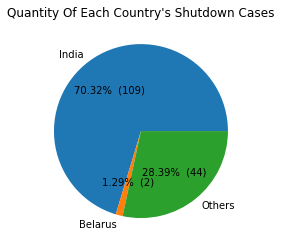

In [14]:
# graph "Quantity Of Each Country's Shutdown Cases"
data = [df_india.shape[0], df_belarus.shape[0], other_c]
lbl = ['India', 'Belarus', 'Others']

plt.title("Quantity Of Each Country's Shutdown Cases")
plt.pie(data, labels=lbl, autopct=make_autopct(data));

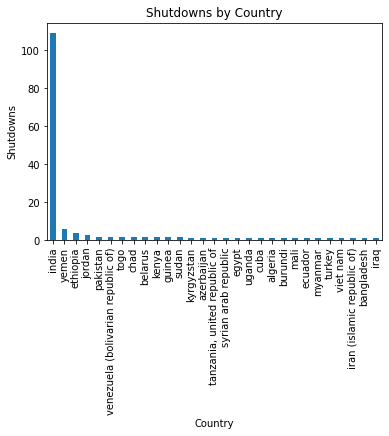

In [15]:
# graph "Shutdowns by Country"
country_counts = df['country'].value_counts()

ax = country_counts.plot(kind='bar')

ax.set_xlabel('Country')
ax.set_ylabel('Shutdowns')
ax.set_title('Shutdowns by Country')

ax;

#### Month with most shutdowns in India

In [16]:
# count of shutdowns per month
grouped = df_india.groupby([pd.Grouper(key='start_date', freq='M'), 'country'])

counts = grouped['start_date'].count()

counts

start_date  country
2019-08-31  india       1
2020-01-31  india       7
2020-02-29  india       7
2020-03-31  india       3
2020-04-30  india      10
2020-05-31  india      15
2020-06-30  india      17
2020-07-31  india       7
2020-08-31  india       7
2020-09-30  india       7
2020-10-31  india      10
2020-11-30  india       9
2020-12-31  india       9
Name: start_date, dtype: int64

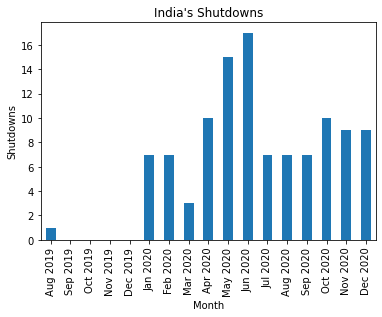

In [17]:
# graph of shutdowns per month
india_counts = df[df['country'] == 'india'].groupby(pd.Grouper(key='start_date', freq='M'))['id'].count()

ax = india_counts.plot(kind='bar')

ax.set_xlabel('Month')
ax.set_ylabel('Shutdowns')
ax.set_title("India's Shutdowns")

ax.set_xticklabels(india_counts.index.strftime('%b %Y'))

ax;

#### Average duration of the shutdowns & top 3 highest durations

In [18]:
# average duration of the shutdowns in India
dur_avg_ind = df_india['duration'].mean()
dur_avg_ind.round(2)

3.19

In [19]:
# average duration of the shutdowns in Belarus
dur_avg_bel = df_belarus['duration'].mean()
dur_avg_bel.round(2)

60.0

In [20]:
# top duration shutdowns in India
top_5_dur_ind = df_india['duration'].nlargest(5)
top_5_dur_ind

2      175.0
48      15.0
136     14.0
148     11.0
19       9.0
Name: duration, dtype: float64

In [21]:
# top duration shutdowns in Belarus
top_dur_bel = df_belarus['duration'].nlargest()
top_dur_bel

93    120.0
70      0.0
Name: duration, dtype: float64

#### Top duration cases comparison (India & Belarus)

In [22]:
# comparison
ind_top1_dur = df_india.loc[df_india['duration'].idxmax()]
bel_top1_dur = df_belarus.loc[df_belarus['duration'].idxmax()]

ind_top1_dur.compare(bel_top1_dur)

,self,other
id,3,94
start_date,2019-08-03 00:00:00,2020-08-09 00:00:00
end_date,2020-01-25 00:00:00,2020-12-07 00:00:00
duration,175.0,120.0
info_source,NaN,news media article
news_link,https://www.news18.com/news/india/omar-abdulla...,https://netobservatory.by/belarus-shutdown-202...
continent,asia,europe
country,india,belarus
state/india,jammu and kashmir,NaN
geo_scope,level 2,level 3


#### Main source

India:

In [23]:
# count of source
df_ind_infos = df_india['info_source'].value_counts()
df_ind_infos

other                 57
news media article    50
social media           1
Name: info_source, dtype: int64

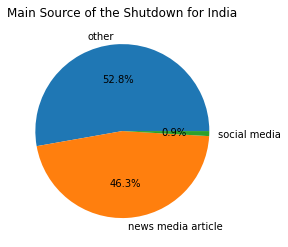

In [24]:
# graph of source
ax = df_ind_infos.plot(kind='pie', autopct='%1.1f%%')

ax.set_title('Main Source of the Shutdown for India')
ax.set_ylabel('')

ax;

Belarus:

In [25]:
# count of source
df_bel_infos = df_belarus['info_source'].value_counts()
df_bel_infos

news media article    2
Name: info_source, dtype: int64

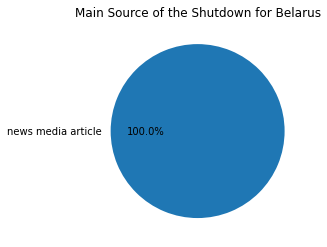

In [26]:
# graph of source
ax = df_bel_infos.plot(kind='pie', autopct='%1.1f%%')

ax.set_title('Main Source of the Shutdown for Belarus')
ax.set_ylabel('')

ax;

#### Main geographical infos


India:

In [27]:
# shutdowns by area
df_india['state/india'].value_counts()

jammu and kashmir    83
west bengal           3
rajasthan             3
maharashtra           1
andhra pradesh        1
madhya pradesh        1
uttar pradesh         1
meghalaya             1
manipur               1
arunachal pradesh     1
Name: state/india, dtype: int64

In [28]:
# level of shutdown
df_india['geo_scope'].value_counts()

level 1    75
level 2    34
Name: geo_scope, dtype: int64

Belarus:

In [29]:
# shutdowns by area
df_belarus['area_name'].value_counts()

national    2
Name: area_name, dtype: int64

In [30]:
# level of shutdown
df_belarus['geo_scope'].value_counts()

level 3    2
Name: geo_scope, dtype: int64

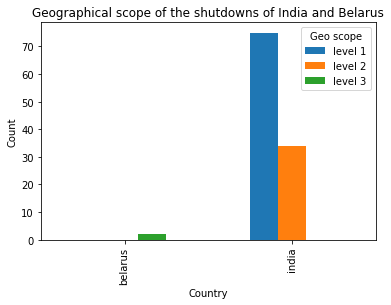

In [31]:
# graphical vizualsation
df_ib = df[df['country'].isin(['india', 'belarus'])]
df_ib_grouped = df_ib.groupby(['geo_scope', 'country']).size().reset_index(name='count')
df_ib_pivot = df_ib_grouped.pivot(index='country', columns='geo_scope', values='count')

ax = df_ib_pivot.plot(kind='bar')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Geographical scope of the shutdowns of India and Belarus')
ax.legend(title='Geo scope', loc='upper right')

ax;

#### Government vs Reality

India:

In [32]:
# investigating government justification
gov_ind = df_india[["election","actual_cause","legal_justif", "violence", "duration", "official_just", "gov_ack", "ordered_by"]]
count_columns(gov_ind)

---- election ---
no     99
yes    10


---- actual_cause ---
political instability            75
elections                        10
protests                          8
religious holiday/anniversary     5
other                             5


---- legal_justif ---
yes        95
unknown    10
no          1


---- violence ---
yes        80
no         22
unknown     7


---- duration ---
1.0    40
0.0    37
2.0     6
4.0     2
5.0     2


---- official_just ---
precautionary measure                                             85
fake news/ hate speech/ incendiary content/ promoting violence    14
public safety/ quell unrest / restore public order                 5
unknown                                                            2
school exams                                                       2


---- gov_ack ---
yes        107
unknown      2


---- ordered_by ---
local government    103
state government      3
unknown               2
military              1




In [33]:
# investigating shudowns in times of elections
elect_ind = gov_ind[(gov_ind.election == "Yes ") | (gov_ind.actual_cause == "elections")]
count_columns(elect_ind[['election','actual_cause','violence','duration','legal_justif', 'official_just','gov_ack','ordered_by']])

---- election ---
yes    10


---- actual_cause ---
elections    10


---- violence ---
no     9
yes    1


---- duration ---
1.0     2
14.0    1
11.0    1


---- legal_justif ---
yes    9


---- official_just ---
fake news/ hate speech/ incendiary content/ promoting violence    8
precautionary measure                                             2


---- gov_ack ---
yes    10


---- ordered_by ---
local government    10




Belarus:

In [34]:
# investigating government justification
gov_bel = df_belarus[["country", "duration", "actual_cause", "other_cause_details", 
                      "violence", "election", "official_just", "gov_ack", "ordered_by"]]
count_columns(gov_bel)

---- country ---
belarus    2


---- duration ---
0.0      1
120.0    1


---- actual_cause ---
other        1
elections    1


---- other_cause_details ---
preparation of shutdowns    1
elections and protests      1


---- violence ---
no     1
yes    1


---- election ---
no     1
yes    1


---- official_just ---
unknown                                 1
national security/ counter-terrorism    1


---- gov_ack ---
no         1
unknown    1


---- ordered_by ---
executive government    2




In [35]:
# investigations Belarus' longest and most relevant shutdown
belarus_max_duration = df[df['country'] == 'belarus']['duration'].max()
id_belarus_max_duration = df.loc[(df['country'] == 'belarus') & (df['duration'] == belarus_max_duration), 'id'].values[0]
id_belarus_max_duration

94

In [36]:
bel_mostr = df.loc[df['id'] == 94]
bel_mostr.drop(['users_affected/targetted','legal_justif','legal_method','telco_resp','off_statement', 
                             'other_just_details', 'telcos_involved', 'state/india', 'decision_maker',
                            'sms_affected', 'phone_call_affected', 'gov_ack'], axis=1)

,id,start_date,end_date,duration,info_source,news_link,continent,country,geo_scope,area_name,ordered_by,shutdown_type_new,affected_network,full_or_service-based,facebook_affected,twitter_affected,whatsapp_affected,instagram_affected,telegram_affected,other_service_details(specify),official_just,actual_cause,other_cause_details,election,violence,hr_abuse_reported,users_notified,telco_ack
93,94,2020-08-09,2020-12-07,120.0,news media article,https://netobservatory.by/belarus-shutdown-202...,europe,belarus,level 3,national,executive government,"shutdown, throttle","broadband, mobile","full network, service-based",yes,yes,yes,yes,yes,"youtube, viber",national security/ counter-terrorism,elections,elections and protests,yes,yes,yes,no,yes


#### Shutdown media infos

India:

In [37]:
# network affected
shut_ind = df_india[["country", "shutdown_type_new", "affected_network", "full_or_service-based"]]
shut_ind.value_counts()

country  shutdown_type_new   affected_network   full_or_service-based
india    shutdown            mobile             full network             100
                             broadband, mobile  full network               4
         shutdown, throttle  mobile             full network               3
         shutdown            unknown            full network               1
         throttle            mobile             full network               1
dtype: int64

In [38]:
#social media affected
social_media_ind = df_india[["facebook_affected", "twitter_affected", "whatsapp_affected", "instagram_affected", "telegram_affected"]]
count_columns(social_media_ind)

---- facebook_affected ---
no     108
yes      1


---- twitter_affected ---
no     108
yes      1


---- whatsapp_affected ---
no     108
yes      1


---- instagram_affected ---
no     108
yes      1


---- telegram_affected ---
no         108
unknown      1




In [39]:
# telecom media affected
telecom_ind = df_india[["sms_affected", "phone_call_affected", "telcos_involved", "telco_resp", "telco_ack"]]
count_columns(telecom_ind)

---- sms_affected ---
no         99
yes         9
unknown     1


---- phone_call_affected ---
no         101
yes          7
unknown      1


---- telcos_involved ---
india: bsnl    1


---- telco_resp ---
https://twitter.com/airtel_presence/status/1223100898185887746?s=20    1


---- telco_ack ---
unknown    91
no         13
yes         1




Belarus:

In [40]:
# network affected
shut_bel = df_belarus[["country", "shutdown_type_new", "affected_network", "full_or_service-based"]]
shut_bel.value_counts()

country  shutdown_type_new   affected_network   full_or_service-based      
belarus  shutdown            broadband, mobile  full network, service-based    1
         shutdown, throttle  broadband, mobile  full network, service-based    1
dtype: int64

In [41]:
#social media affected
social_media_bel = df_belarus[["facebook_affected", "twitter_affected", "whatsapp_affected", "instagram_affected", "telegram_affected",
              "other_service_details(specify)"]]
count_columns(social_media_bel)

---- facebook_affected ---
no     1
yes    1


---- twitter_affected ---
no     1
yes    1


---- whatsapp_affected ---
no     1
yes    1


---- instagram_affected ---
no     1
yes    1


---- telegram_affected ---
yes    2


---- other_service_details(specify) ---
viber and corporate vpn service providers    1
youtube, viber                               1




In [42]:
# telecom media affected
telecom_bel = df_belarus[["country","election", "sms_affected", "phone_call_affected", "telco_ack"]]
count_columns(telecom_bel)

---- country ---
belarus    2


---- election ---
no     1
yes    1


---- sms_affected ---
no         1
unknown    1


---- phone_call_affected ---
no         1
unknown    1


---- telco_ack ---
no     1
yes    1




#### Shutdown violence cases

In [43]:
# cases on India
users_ind = df_india[["violence", "hr_abuse_reported", "users_notified", "users_affected/targetted"]]
count_columns(users_ind)

---- violence ---
yes        80
no         22
unknown     7


---- hr_abuse_reported ---
unknown    98
no          7
yes         4


---- users_notified ---
no         103
yes          3
unknown      1


---- users_affected/targetted ---
ethnic minorities, religious minorities    1




In [44]:
# cases on Belarus
user_bel = df_belarus[["violence", "hr_abuse_reported", "users_notified", "users_affected/targetted"]]
count_columns(user_bel)

---- violence ---
no     1
yes    1


---- hr_abuse_reported ---
no     1
yes    1


---- users_notified ---
no    2


---- users_affected/targetted ---
Series([], )




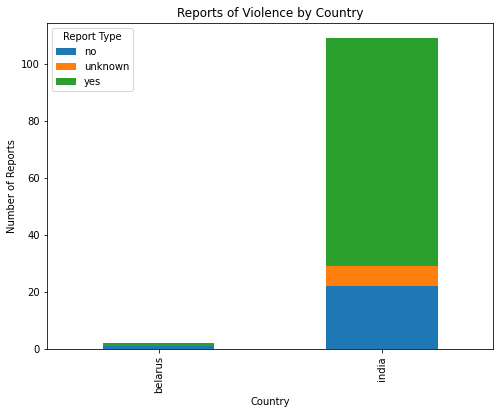

In [45]:
# graph of violence cases in both countries
df_new = df.loc[df['country'].isin(['belarus', 'india']), ['country', 'violence']]
df_plot = df_new.groupby(['country', 'violence']).size().reset_index(name='count')
df_pivot = df_plot.pivot(index=['country'], columns=['violence'], values='count')

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel("Country")
ax.set_ylabel("Number of Reports")
ax.set_title("Reports of Violence by Country")
ax.legend(title="Report Type")
ax;

### Task consideration points:

Who ordered the shutdowns?

In [46]:
# in India
ordered_ind = df_india[["ordered_by"]]
ordered_ind.value_counts()

ordered_by      
local government    103
state government      3
unknown               2
military              1
dtype: int64

In [47]:
# in Belarus
ordered_bel = df_belarus[["ordered_by"]]
ordered_bel.value_counts()

ordered_by          
executive government    2
dtype: int64

For the unique traits of these shutdowns point of consideration, the data used to answer is in the code above used to explore the data further.

What communities are impacted? How are they impacted?

In [48]:
# India
impact_ind = df_india[["duration", "state/india", "area_name", "ordered_by", "affected_network", "gov_ack",
                       "actual_cause", "legal_justif", "violence", "hr_abuse_reported"]]

impact_ind = impact_ind[impact_ind["state/india"].str.strip() == 'jammu and kashmir']
count_columns(impact_ind)

---- duration ---
1.0      37
0.0      33
2.0       5
175.0     1
4.0       1


---- state/india ---
jammu and kashmir    83


---- area_name ---
kashmir valley                            5
shopian, in jammu and kashmir             5
pulwama                                   5
kulgam, in jammu and kashmir              4
pulwama district, in jammu and kashmir    4


---- ordered_by ---
local government    80
state government     1
unknown              1
military             1


---- affected_network ---
mobile               82
broadband, mobile     1


---- gov_ack ---
yes        82
unknown     1


---- actual_cause ---
political instability            73
religious holiday/anniversary     4
other                             3
protests                          2
elections                         1


---- legal_justif ---
yes        81
unknown     1


---- violence ---
yes        70
no          8
unknown     5


---- hr_abuse_reported ---
unknown    79
yes         2
no          2




In [49]:
# Belarus
impact_bel = df_belarus[["duration", "area_name", "ordered_by", "affected_network", "gov_ack",
                       "actual_cause", "legal_justif", "violence", "hr_abuse_reported"]]

count_columns(impact_bel)

---- duration ---
0.0      1
120.0    1


---- area_name ---
national    2


---- ordered_by ---
executive government    2


---- affected_network ---
broadband, mobile    2


---- gov_ack ---
no         1
unknown    1


---- actual_cause ---
other        1
elections    1


---- legal_justif ---
Series([], )


---- violence ---
no     1
yes    1


---- hr_abuse_reported ---
no     1
yes    1




## Task 2
*There is a tweet report that a mobile network shutdown is ongoing in Niger right after its 2021
presidential election. How would you proceed to verify this claim?
(Please list any kind of evidence you think would be key to verify this shutdown and a plan to
get them.)*

First, I would check if I already have sources on the ground or that have access to them that my organization already trusts and that where already verified as a reliable source.<br>
I would also verify the twitter account:
 - Is it a new or old one?
 - How frequent are the posts?
 - Do the older posts have truthful information?
 - Does the account have friends, followers and is follow others?
 - Check the interactions from this account to others.
 - Get in touch with the source and verify them and if anyone else has this information.
 - Do crowdsourcing verification, the "Andy Carvin's Method", retweeting the report and asking for other users to help verify it, or even refute it.

Since the data in STOP is authentic, I can say that the biggest information source is News media articles, so I would also 
examine them for reliable confirmation to what was stated on the tweet report.<br>
There are some methodologies that can be applied to verify a source, for example 5Ws, SMART Check, CRAAP test and so on, I would apply those to the tweet report and the sources I would investigate for confirmation.<br>

I would also check in STOP if this kind of activity already happened in the country for the same or similar political reasons so it would indicate if the report is realistic or if it's a first time occurrence and requires even more inspection.<br>

I would have to research deeper to know if this option is possible: Since mobile network shutdowns restrict the access to social networks we could as an NGO get in touch with the social media companies and have them report any suspicious shutdown activity, specially if it occurs in a large area; they should be able to verify if their service was affected and could then report back to our organization, or give us the path to find this information in case they have a transparency page, for our further investigation and tracking.


In [50]:
df.groupby(['info_source']).size()

info_source
confidential           1
cso kio partners       7
news media article    85
other                 57
social media           4
dtype: int64

## Task 3:
*Here is the current STOP data intake form. Please go through the form and name any
question that can be improved in your view as well as improvement suggestions.*

- Why is it not anonymous? Someone without a Google account or that does not remember their password could not fill it. Since the form does not ask for any identification or personal data the email address should also not be mandatory. Maybe put at the end one question that says if the person feels comfortable they can leave a contact number or email for further verification or questions.

- Make the form in another free platform, for example WPForms or JotForm to avoid that.

- Make all questions mandatory - it may annoy people but also may encourage them to give more detailed information. For example, in the scope written question, is always possible for the user to write 'I am not sure, but I am from *this region* and I don't have access anymore', providing us possibly better information rather than vague.

- Very shortly explain what shutdown and throttle mean so its clear for all users. 

- Also for the next two questions (services and full or service shutdown), if a user without the knowledge comes across our form they wouldn't know how to answer, making our information collected prone to mistakes and inaccuracy.

- Put a 'Other' option in the question of who ordered the shutdown and mention in the next question: if you selected 'Oder' please fill with an explanation. (do that to other alike questions as well).

- 'State Government' can come across as confusing as some people might understand it as the same as Executive Government, as the political definition of State.

- Would be interesting to have this form in more languages in case the user does not understand English; right on the beginning of the form a language selection could be made available.

- If this form is made for exhaustive data collection according to STOP metrics, it should have questions that complete all of the data indexes in STOP, such as the social networks affected, violent episodes, telecoms affected, user notification and so on.

- We can additionally ask about the life impact of the shutdown (or even economical), so we gather qualitative data as well.

In [51]:
df["actual_cause"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

political instability            51.6%
other                            11.6%
elections                        11.0%
protests                          9.0%
communal violence                 4.5%
exam cheating                     4.5%
unknown                           3.9%
religious holiday/anniversary     3.2%
information control               0.6%
Name: actual_cause, dtype: object

# Exporting my cleaned data for a future Tableau visualization project.

In [52]:
df.to_csv('KeepItOn_CleanedData.csv', index=False)